In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv('Train_UWu5bXk (1).csv')

In [4]:
test=pd.read_csv('Test_u94Q5KV (1).csv')

In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [7]:
item_id=test['Item_Identifier']
Outlet_Identifier=test['Outlet_Identifier']

In [8]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [9]:
train.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,14.800,Low Fat,0.044878,Soft Drinks,75.4670,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
train['Outlet_Size'].fillna('Medium',inplace=True)
test['Outlet_Size'].fillna('Medium',inplace=True)

In [11]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [12]:
test.isnull().any()

Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [13]:
train.isnull().any()

Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [14]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
labelencoder_f=LabelEncoder()

In [17]:
train['Item_Fat_Content']=labelencoder_f.fit_transform(train['Item_Fat_Content'])
test['Item_Fat_Content']=labelencoder_f.fit_transform(test['Item_Fat_Content'])

In [18]:
labelencoder_t=LabelEncoder()
train['Item_Type']=labelencoder_t.fit_transform(train['Item_Type'])
test['Item_Type']=labelencoder_t.fit_transform(test['Item_Type'])

In [19]:
labelencoder_os=LabelEncoder()
train['Outlet_Size']=labelencoder_os.fit_transform(train['Outlet_Size'])
test['Outlet_Size']=labelencoder_os.fit_transform(test['Outlet_Size'])

In [20]:
labelencoder_lt=LabelEncoder()
train['Outlet_Location_Type']=labelencoder_lt.fit_transform(train['Outlet_Location_Type'])
test['Outlet_Location_Type']=labelencoder_lt.fit_transform(test['Outlet_Location_Type'])

In [21]:
labelencoder_ot=LabelEncoder()
train['Outlet_Type']=labelencoder_ot.fit_transform(train['Outlet_Type'])
test['Outlet_Type']=labelencoder_ot.fit_transform(test['Outlet_Type'])

In [22]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
X=train.iloc[:,0:9].values
y=train.iloc[:,-1].values

In [24]:
X

array([[9.30000000e+00, 1.00000000e+00, 1.60473010e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.92000000e+00, 2.00000000e+00, 1.92782160e-02, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.75000000e+01, 1.00000000e+00, 1.67600750e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.06000000e+01, 1.00000000e+00, 3.51862710e-02, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.21000000e+00, 2.00000000e+00, 1.45220646e-01, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.48000000e+01, 1.00000000e+00, 4.48782800e-02, ...,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [25]:
corr=train.corr()

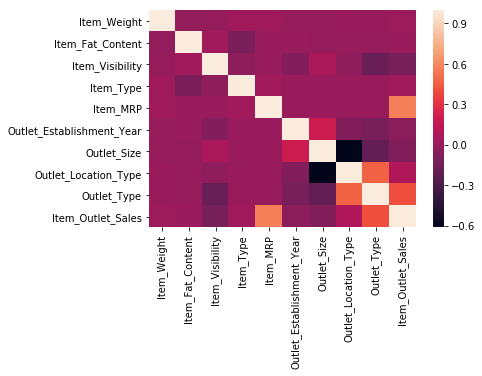

In [26]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

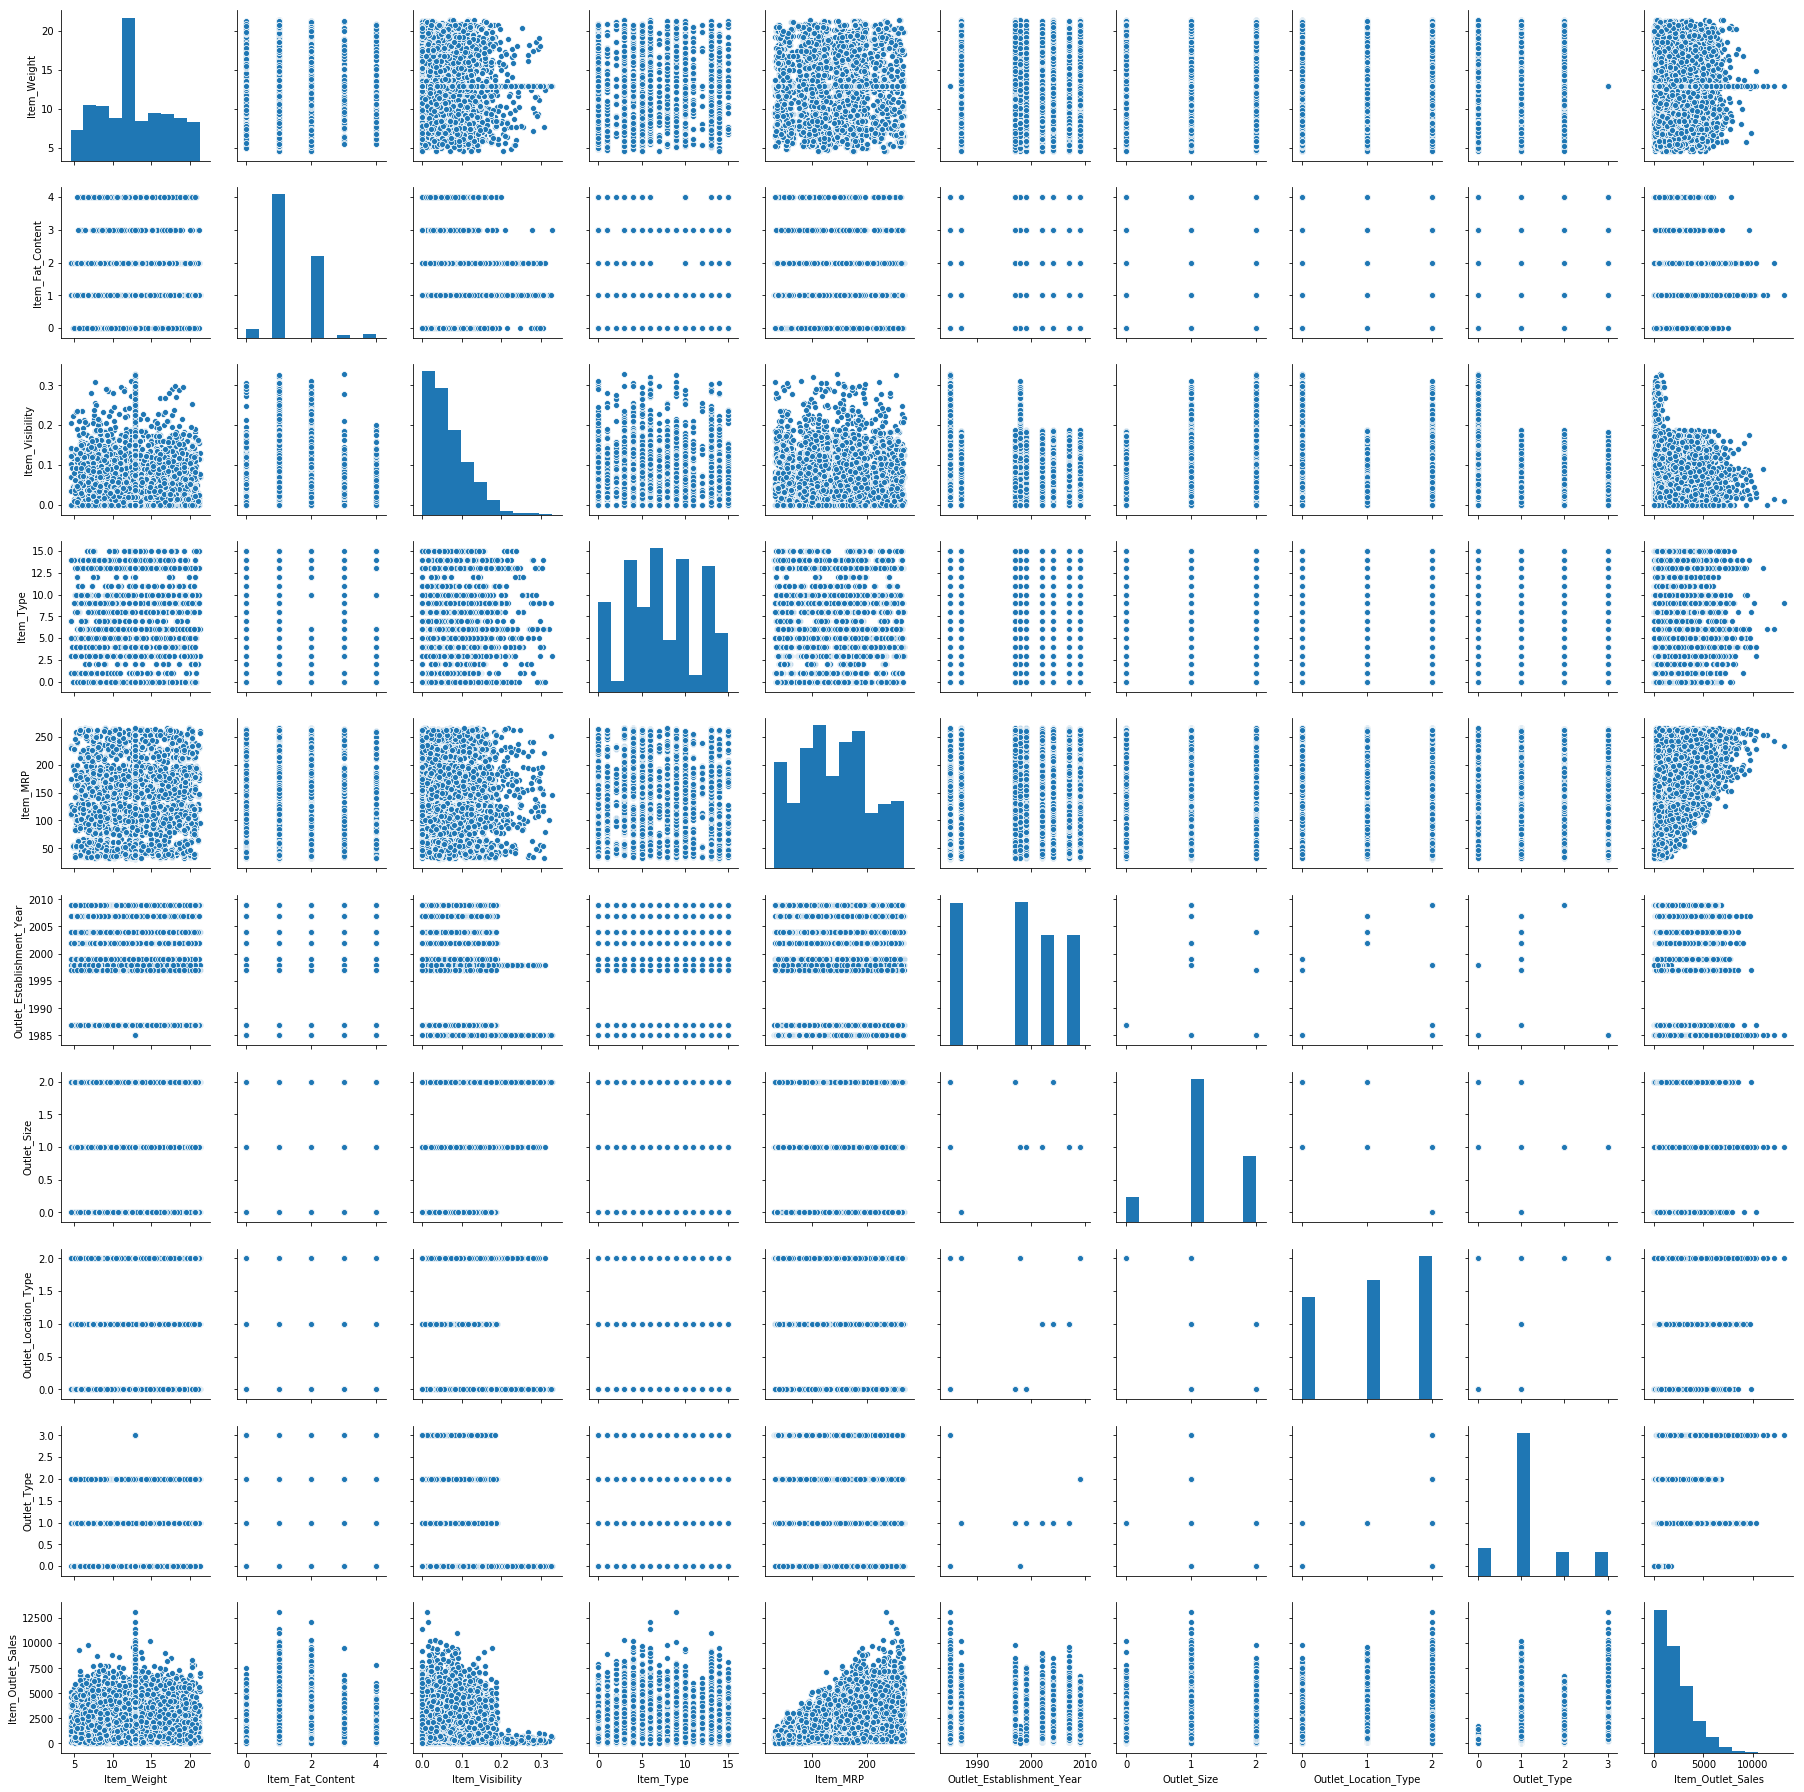

In [27]:
sns.pairplot(train)

/home/hidayat/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


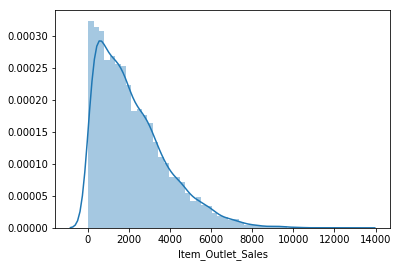

In [28]:
sns.distplot(train['Item_Outlet_Sales'])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc_X=StandardScaler()

In [87]:
X_train=sc_X.fit_transform(X_train)

In [88]:
X_test=sc_X.fit_transform(X_test)

In [89]:
X_test[0]

array([ 0.36383318, -0.57791931, -0.76476023, -0.4852905 , -0.94884831,
       -1.29697213, -1.94535345,  1.12203842, -0.22494293])

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [91]:
poly_reg=PolynomialFeatures(degree=4)

In [92]:
X_poly=poly_reg.fit_transform(X_train)
pred=poly_reg.fit_transform(X_test)
poly_reg.fit(X_train,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [93]:
linearReg=linear_model.LassoLars(max_iter=200)

In [94]:
linearReg.fit(X_poly,y_train)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=200, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [95]:
pred

array([[ 1.00000000e+00,  3.63833175e-01, -5.77919311e-01, ...,
         6.37030375e-02, -1.27709957e-02,  2.56029127e-03],
       [ 1.00000000e+00, -1.14369073e+00, -5.77919311e-01, ...,
         8.74976687e-02,  1.49672816e-02,  2.56029127e-03],
       [ 1.00000000e+00,  4.11165166e-01,  9.96126098e-01, ...,
         8.74976687e-02,  1.49672816e-02,  2.56029127e-03],
       ...,
       [ 1.00000000e+00,  4.11165166e-01,  9.96126098e-01, ...,
         6.37030375e-02, -1.27709957e-02,  2.56029127e-03],
       [ 1.00000000e+00, -7.01136613e-01,  9.96126098e-01, ...,
         1.39723765e+00,  1.31186748e+00,  1.23171336e+00],
       [ 1.00000000e+00, -1.14960722e+00, -5.77919311e-01, ...,
         4.71008097e-04,  1.09814294e-03,  2.56029127e-03]])

In [96]:
predicted=linearReg.predict(pred)

In [97]:
from sklearn.metrics import r2_score,mean_squared_error

In [98]:
print(r2_score(predicted,y_test))

0.2099543841078726


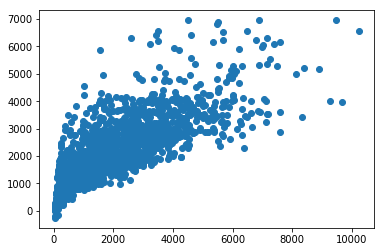

In [99]:
plt.scatter(y_test,predicted)

In [100]:
np.sqrt(mean_squared_error(y_test,predicted))

1057.8635432464923

In [101]:
#testing--------- 

In [102]:
test1=test.values

In [103]:
test1=sc_X.fit_transform(test1)

In [104]:
test1[0]

array([ 1.89745979, -0.57528374, -1.13407715,  1.36691643, -0.53655526,
        0.13989058, -0.28473712, -1.369215  , -0.25276858])

In [105]:
test1=poly_reg.fit_transform(test1)

In [106]:
test1[0]


array([ 1.00000000e+00,  1.89745979e+00, -5.75283745e-01, -1.13407715e+00,
        1.36691643e+00, -5.36555255e-01,  1.39890583e-01, -2.84737119e-01,
       -1.36921500e+00, -2.52768583e-01,  3.60035365e+00, -1.09157777e+00,
       -2.15186578e+00,  2.59366895e+00, -1.01809202e+00,  2.65436756e-01,
       -5.40277233e-01, -2.59803040e+00, -4.79618221e-01,  3.30951387e-01,
        6.52416147e-01, -7.86364800e-01,  3.08671516e-01, -8.04767785e-02,
        1.63804636e-01,  7.87687130e-01,  1.45413657e-01,  1.28613097e+00,
       -1.55018868e+00,  6.08495052e-01, -1.58646713e-01,  3.22913859e-01,
        1.55279543e+00,  2.86659073e-01,  1.86846052e+00, -7.33426192e-01,
        1.91218736e-01, -3.89211845e-01, -1.87160247e+00, -3.45513528e-01,
        2.87891542e-01, -7.50590275e-02,  1.52777197e-01,  7.34659502e-01,
        1.35624311e-01,  1.95693752e-02, -3.98320416e-02, -1.91540284e-01,
       -3.53599444e-02,  8.10752268e-02,  3.89866333e-01,  7.19725979e-02,
        1.87474971e+00,  

In [107]:
X[0]

array([9.3000000e+00, 1.0000000e+00, 1.6047301e-02, 4.0000000e+00,
       2.4980920e+02, 1.9990000e+03, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00])

In [108]:
predict_test=linearReg.predict(test1)

In [109]:
predict_test

array([1742.07939963, 1499.98698287, 2282.73190278, ..., 1935.2136491 ,
       3321.85037284, 1382.15126824])

In [110]:
pd.read_csv('SampleSubmission_TmnO39y.csv').head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [111]:
submission=pd.DataFrame({'Item_Identifier':item_id,'Outlet_Identifier':Outlet_Identifier,'Item_Outlet_Sales':predict_test})

In [112]:
submission.to_csv('final_sub_big_mart.csv',index=False)

/home/hidayat/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


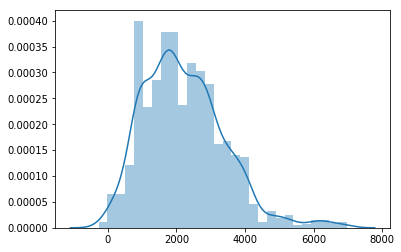

In [113]:
sns.distplot(predicted)

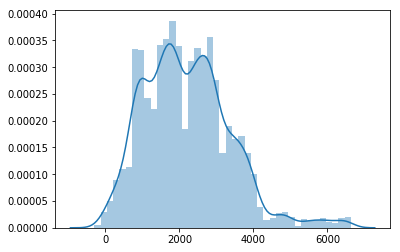

In [114]:
sns.distplot(predict_test)